# ETAPA FINAL - Processo Seletivo
# Bolsa de pesquisa na área de dados da FGV Direito Rio

## Candidato: José Valentim Rosa

## Fontes:

* [GOVERNO ABERTO SP](http://catalogo.governoaberto.sp.gov.br/dataset/869-pesquisa-origem-e-destino)

#### Orientações
Com as informações de 2007 gostaríamos que respondesse as seguintes perguntas:

1. Analisando as variáveis e informação que a base contém, que perguntas você acha possível fazer para essa base? Outras bases de dados podem ser usadas em conjunto com essa, se sim, diga quais são elas. Guie-se pelo quão interessante você acha a pergunta. São sugeridas 3 pergutas.

2. Quais são as variáveis socioeconomicas que impactam em como pessoas de setores distintos escolhem seus modos de locomoção?
Em modos de locomoção, considere: público e particular. Sobre as variáveis socioeconomicas, qualquer que está na base pode ser utilizada.

As soluções tem que estar documentadas no seu GitHub até o final do dia 14 de junho. Tenha em mente que é mais importante uma solução simples, completa, documentada e informativa do que um complexa, incompleta, não documentada e confusa.

## 1. Carregando bibliotecas

In [135]:
import pysal as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.2)
pal = sns.color_palette()
sns.set(color_codes=True)
sns.set_style('darkgrid')

## 2. Importando os dados

A função dbf_PDF criada abaixo, pega o arquivo originalmente salvo no formato dbf, que é um tipo de formato de banco de dados, e retorna um Pandas DataFrame.

In [136]:
def dbf_PDF(dbfile, upper=True):
    dbf = ps.open(dbfile)
    PDF = pd.DataFrame(dbf[:])
    if upper == True:
        PDF.columns = map(str.upper, dbf.header) 
    dbf.close() 
    return PDF

In [137]:
df = dbf_PDF("OD_2007_v2d.dbf")

In [138]:
df

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESBICI,ID_ORDEM,DISTANCIA
0,1,36,333729.0,7394430.0,0010001,1,17.97777,1,6,2007-08-17,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,1,604.07
1,1,36,333729.0,7394430.0,0010001,0,17.97777,1,6,2007-08-17,...,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,2,604.07
2,1,36,333858.0,7394484.0,0010018,1,17.67677,18,6,2007-08-16,...,75.0,12.0,1.0,2.0,NaN,NaN,NaN,NaN,3,26271.11
3,1,36,333858.0,7394484.0,0010018,0,17.67677,18,6,2007-08-16,...,80.0,12.0,1.0,2.0,NaN,NaN,NaN,NaN,4,26271.11
4,1,36,333858.0,7394484.0,0010018,0,17.67677,18,6,2007-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
5,1,36,333801.0,7394422.0,0010019,1,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,6,997.57
6,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,7,997.57
7,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,8,997.57
8,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,30.0,15.0,4.0,NaN,NaN,NaN,1.0,3.0,9,997.57
9,1,36,333801.0,7394422.0,0010019,0,17.67677,19,6,2007-08-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196698 entries, 0 to 196697
Columns: 123 entries, ZONA to DISTANCIA
dtypes: float64(93), int64(25), object(5)
memory usage: 184.6+ MB


## 3. Análise Exploratória dos dados

In [140]:
dfs = df[['ZONA','MUNI_DOM','DOM','DATA','TOT_FAM','FAMILIA','CONDMORA','NAO_DCL_IT','RENDA_FA','PESSOA','SIT_FAM','IDADE','SEXO','ESTUDA','GRAU_INS','N_VIAG','DIA_SEM','TOT_VIAG','DISTANCIA']]

In [141]:
dfs

,ZONA,MUNI_DOM,DOM,DATA,TOT_FAM,FAMILIA,CONDMORA,NAO_DCL_IT,RENDA_FA,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,N_VIAG,DIA_SEM,TOT_VIAG,DISTANCIA
0,1,36,1,2007-08-17,1,1,1,T,850.00,1,1,29,1,1,4,1.0,6.0,2,604.07
1,1,36,1,2007-08-17,1,1,1,T,850.00,1,1,29,1,1,4,2.0,6.0,2,604.07
2,1,36,18,2007-08-16,1,1,1,T,2600.00,1,1,51,1,1,4,1.0,5.0,2,26271.11
3,1,36,18,2007-08-16,1,1,1,T,2600.00,1,1,51,1,1,4,2.0,5.0,2,26271.11
4,1,36,18,2007-08-16,1,1,1,T,2600.00,2,2,52,2,1,1,NaN,NaN,0,NaN
5,1,36,19,2007-08-16,1,1,1,T,881.83,1,1,42,1,1,1,1.0,5.0,4,997.57
6,1,36,19,2007-08-16,1,1,1,T,881.83,1,1,42,1,1,1,2.0,5.0,4,997.57
7,1,36,19,2007-08-16,1,1,1,T,881.83,1,1,42,1,1,1,3.0,5.0,4,997.57
8,1,36,19,2007-08-16,1,1,1,T,881.83,1,1,42,1,1,1,4.0,5.0,4,997.57
9,1,36,19,2007-08-16,1,1,1,T,881.83,2,2,40,2,1,1,NaN,NaN,0,NaN


TypeError: unhashable type: '_ColorPalette'

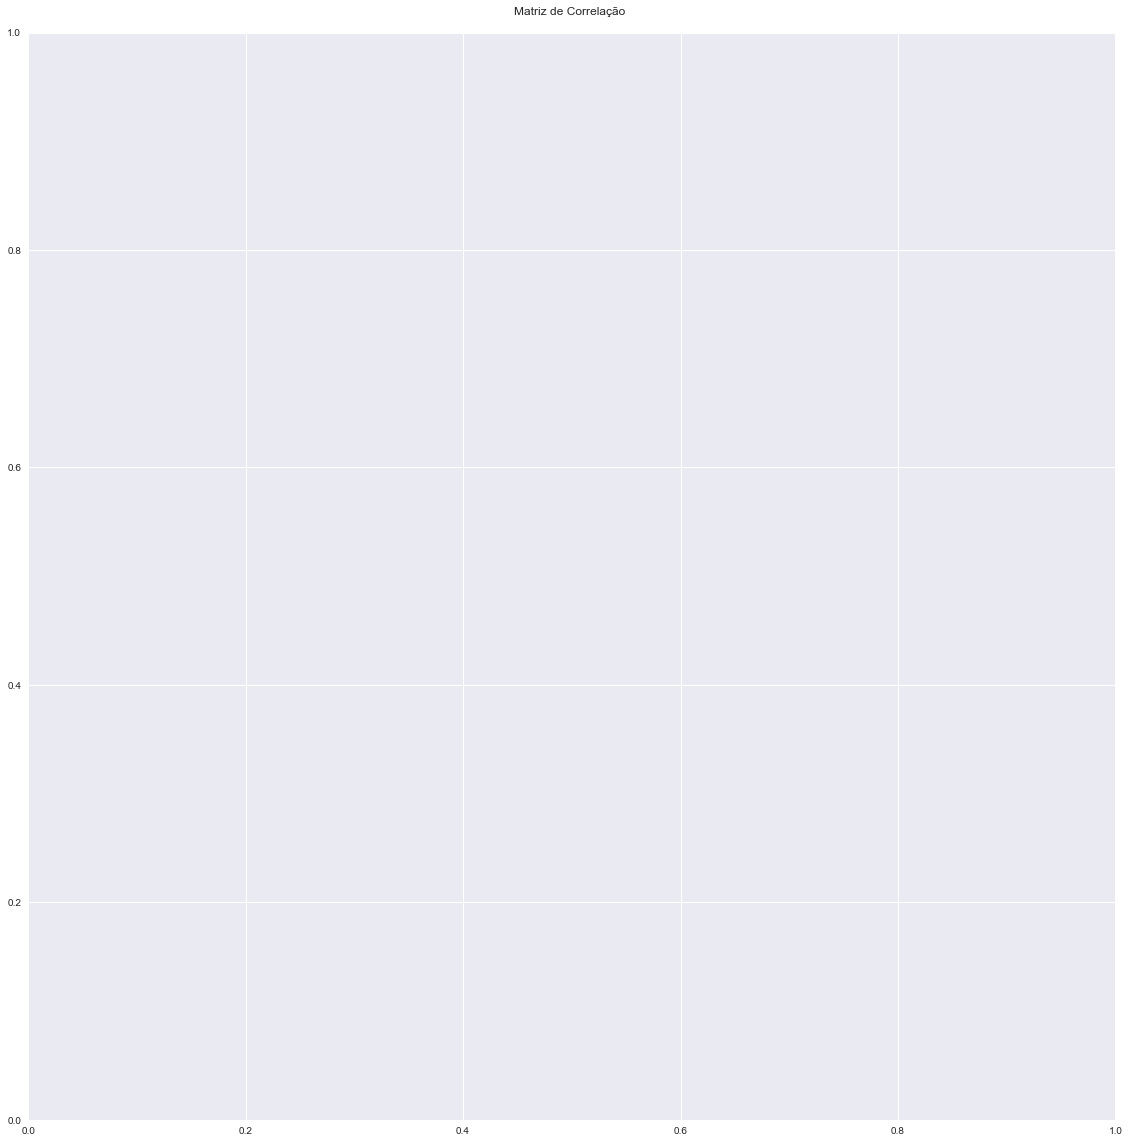

In [142]:
colormap = sns.cubehelix_palette(10, start=.5, rot=-.75)
plt.figure(figsize=(20,20))
plt.title('Matriz de Correlação \n')
sns.heatmap(dfs.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

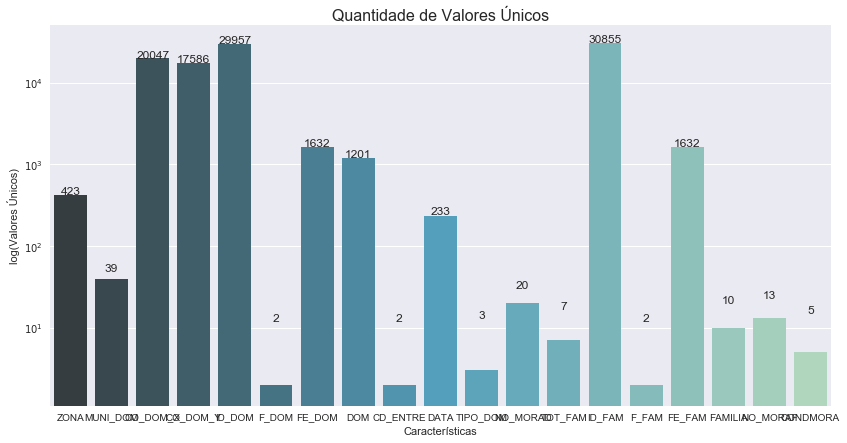

In [111]:
plt.figure(figsize=(14, 7))
uniques = [len(df[col].unique()) for col in ['ZONA',
 'MUNI_DOM',
 'CO_DOM_X',
 'CO_DOM_Y',
 'ID_DOM',
 'F_DOM',
 'FE_DOM',
 'DOM',
 'CD_ENTRE',
 'DATA',
 'TIPO_DOM',
 'NO_MORAD',
 'TOT_FAM',
 'ID_FAM',
 'F_FAM',
 'FE_FAM',
 'FAMILIA',
 'NO_MORAF',
 'CONDMORA']]
ax = sns.barplot(['ZONA',
 'MUNI_DOM',
 'CO_DOM_X',
 'CO_DOM_Y',
 'ID_DOM',
 'F_DOM',
 'FE_DOM',
 'DOM',
 'CD_ENTRE',
 'DATA',
 'TIPO_DOM',
 'NO_MORAD',
 'TOT_FAM',
 'ID_FAM',
 'F_FAM',
 'FE_FAM',
 'FAMILIA',
 'NO_MORAF',
 'CONDMORA'], uniques, log=True, palette="GnBu_d")
ax.set(xlabel='Características', ylabel='log(Valores Únicos)', title='Quantidade de Valores Únicos')
ax.title.set_size(16)
for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x()+p.get_width()/2., p.get_height() + 10, uniq, ha="center") 

In [89]:
def NOTNULL(df):
    df2 = df
    columns = df.columns
    for i in [9, 19,
 20, 21,
 22, 23,
 24, 25,
 26, 27,
 28, 29,
 30, 31,
 32, 35,
 36, 37,
 51, 52,
 53, 54,
 55, 56,
 57, 58,
 59, 60,
 61, 62,
 63, 64,
 65, 66,
 67, 68,
 69, 70,
 71, 72,
 73, 74,
 75, 76,
 77, 79,
 80, 81,
 82, 83,
 84, 85,
 86, 87,
 88, 89,
 90, 91,
 92, 93,
 94, 95,
 96, 97,
 98, 99,
 100, 101,
 102, 103,
 104, 105,
 106, 107,
 108, 109,
 110, 111,
 112, 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122]:
        df2 = df2[df2[columns[i]].notnull()]
        #if (len(df3) < 196698):
         #   df2 = df3
        print (columns[i])
    return df2

In [90]:
df2 = NOTNULL(df)

DATA
QT_RADIO
QT_GEL1
QT_GEL2
QT_TVCOR
QT_FREEZ
QT_VIDEO
QT_BANHO
QT_MOTO
QT_AUTO
QT_ASPIR
QT_MLAVA
QT_EMPRE
QT_MICRO
QT_BICICLE
ANO_AUTO1
ANO_AUTO2
ANO_AUTO3
VL_REN_I
ZONA_ESC
MUNIESC
CO_ESC_X
CO_ESC_Y
TIPO_ESC
ZONATRA1
MUNITRA1
CO_TR1_X
CO_TR1_Y
TRAB1_RE
TRABEXT1
OCUP1
SETOR1
VINC1
ZONATRA2
MUNITRA2
CO_TR2_X
CO_TR2_Y
TRAB2_RE
TRABEXT2
OCUP2
SETOR2
VINC2
N_VIAG
FE_VIA
DIA_SEM
ZONA_O
MUNI_O
CO_O_X
CO_O_Y
ZONA_D
MUNI_D
CO_D_X
CO_D_Y
ZONA_T1
MUNI_T1
CO_T1_X
CO_T1_Y
ZONA_T2
MUNI_T2
CO_T2_X
CO_T2_Y
ZONA_T3
MUNI_T3
CO_T3_X
CO_T3_Y
MOTIVO_O
MOTIVO_D
SERVIR_O
SERVIR_D
MODO1
MODO2
MODO3
MODO4
H_SAIDA
MIN_SAIDA
ANDA_O
H_CHEG
MIN_CHEG
ANDA_D
DURACAO
MODOPRIN
TIPOVG
PAG_VIAG
TP_ESAUTO
VL_EST
PE_BICI
TP_ESBICI
DISTANCIA


In [87]:
df2

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESBICI,ID_ORDEM,DISTANCIA


In [74]:
aux=[]
for i in range(len(columns)):
    df2 = NOTNULL(df,i)
    if (len(df2) < 196698):
        aux.append(i)
aux

[9,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 35,
 36,
 37,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122]

In [70]:
df2 = NOTNULL(df,0)

In [71]:
len(df2)

196698

In [22]:
df.sort_values(by=['ZONA'])

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESBICI,ID_ORDEM,DISTANCIA
0,0.0,0.0,1998.0,NaN,NaN,1,6,1,1,333729.0,...,850.0,1,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
102879,0.0,0.0,1996.0,NaN,NaN,6,6,1,2,356359.0,...,0.0,217,NaN,NaN,217.0,217.0,217.0,NaN,NaN,NaN
102878,0.0,0.0,1996.0,NaN,NaN,6,6,1,2,356359.0,...,0.0,217,NaN,NaN,217.0,217.0,217.0,NaN,NaN,NaN
102877,0.0,0.0,1996.0,NaN,NaN,6,6,1,2,356359.0,...,0.0,217,NaN,NaN,217.0,217.0,217.0,NaN,NaN,NaN
102872,0.0,0.0,NaN,NaN,NaN,6,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,217.0,217.0,NaN,NaN,NaN
102871,0.0,0.0,NaN,NaN,NaN,6,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,217.0,217.0,NaN,NaN,NaN
102870,0.0,0.0,NaN,NaN,NaN,5,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,NaN,217.0,NaN,NaN,NaN
102869,0.0,0.0,NaN,NaN,NaN,5,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,NaN,217.0,NaN,NaN,NaN
102868,0.0,0.0,NaN,NaN,NaN,5,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,NaN,217.0,NaN,NaN,NaN
102867,0.0,0.0,NaN,NaN,NaN,5,6,1,2,355203.0,...,0.0,217,NaN,NaN,217.0,NaN,217.0,NaN,NaN,NaN


In [23]:
df

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,DURACAO,MODOPRIN,TIPOVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESBICI,ID_ORDEM,DISTANCIA
0,0.0,0.0,1998.0,NaN,NaN,1,6,1,1,333729.0,...,850.0,1,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
1,0.0,0.0,1998.0,NaN,NaN,1,6,1,1,333729.0,...,850.0,1,3.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN
2,2.0,2.0,1989.0,NaN,NaN,1,6,1,1,333858.0,...,2000.0,1,327.0,NaN,327.0,NaN,1.0,91.0,NaN,NaN
3,2.0,2.0,1989.0,NaN,NaN,1,6,1,1,333858.0,...,2000.0,1,327.0,NaN,1.0,NaN,327.0,6.0,NaN,NaN
4,NaN,NaN,1989.0,NaN,NaN,7,6,1,1,333858.0,...,600.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,NaN,NaN,1,6,3,1,333801.0,...,NaN,1,24.0,NaN,24.0,NaN,1.0,NaN,NaN,NaN
6,1.0,1.0,NaN,NaN,NaN,1,6,3,1,333801.0,...,NaN,1,24.0,NaN,1.0,NaN,24.0,NaN,NaN,NaN
7,1.0,1.0,NaN,NaN,NaN,1,6,3,1,333801.0,...,NaN,1,24.0,NaN,24.0,NaN,1.0,NaN,NaN,NaN
8,1.0,1.0,NaN,NaN,NaN,1,6,3,1,333801.0,...,NaN,1,24.0,NaN,1.0,NaN,24.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,7,6,3,1,333801.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_csv = pd.read_csv("OD_2007_v2d.csv")

C:\Users\palha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,3,38,68,69,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_csv